# Phase 3: SQL Operations

* 3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table.



* 3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year.



* 3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year.



* 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table



* 3.5	Write SQL query to find the highest number of dacoity/robbery in which district.



* 3.6	Write SQL query to find in which districts(All) the lowest number of murders happened.



* 3.7	Write SQL query to find the number of murders in ascending order in district and year wise.



* 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table.



* 3.8.2	Write SQL query to find which District in each state/UT has the highest number of murders year wise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.



* 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order.



* 3.8.4	Use appropriate graphs to show your data (the result of 3.8.3).

In [2]:
import sqlite3
import csv
import pandas as pd

In [3]:
db=sqlite3.connect("crime_database")

In [4]:
cursor=db.cursor()

In [7]:
cursor.execute("CREATE TABLE crime_against_women_new8(state UT TEXT,DISTRICT TEXT,Year INT,Rape INT,Kidnapping INT,Dowry Deaths INT,Assault INT,Insult  INT,Cruelty by Husband  INT,Importation of Girls INT) ")
db.commit()

# 3.1) Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table:-

In [8]:
with open('42_District_wise_crimes_committed_against_women_2001_2012.csv','r') as file :
    #r here is read as
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crime_against_women_new8 VALUES(?,?,?,?,?,?,?,?,?,?)",row.split(","))#it will split the data row.split
        db.commit()
        no_records += 1

In [9]:
print(no_records,'Records Inserted') 

9018 Records Inserted


# 3.2)	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year:-

In [10]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MAX(Rape), MAX(Kidnapping) FROM crime_against_women_new8 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kidnapping DESC")
for row in result:
    print(row)

('"STATE/UT"', '"DISTRICT"', '"Year"', '"Rape"', '"Kidnapping and Abduction"')
('"UTTAR PRADESH"', '"TOTAL"', 2012, 3425, 7910)
('"UTTAR PRADESH"', '"TOTAL"', 2011, 3406, 7525)
('"UTTAR PRADESH"', '"TOTAL"', 2010, 3135, 5468)
('"UTTAR PRADESH"', '"TOTAL"', 2009, 2998, 5078)
('"UTTAR PRADESH"', '"TOTAL"', 2008, 2937, 4439)
('"UTTAR PRADESH"', '"TOTAL"', 2007, 3010, 3363)
('"UTTAR PRADESH"', '"TOTAL"', 2001, 2851, 2879)
('"UTTAR PRADESH"', '"TOTAL"', 2006, 2900, 2551)
('"UTTAR PRADESH"', '"TOTAL"', 2004, 2875, 2324)
('"UTTAR PRADESH"', '"TOTAL"', 2002, 2891, 2298)
('"UTTAR PRADESH"', '"TOTAL"', 2005, 2921, 2256)
('"RAJASTHAN"', '"TOTAL"', 2003, 2738, 1750)


* The highest district and state in terms of rape and kidnapping incidents in UTTAR PRADESH (which had 3425 rape cases and 7910 kidnapping cases in 2010).

# 3.3) Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year:-

In [11]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MIN(Rape), MIN(Kidnapping) FROM crime_against_women_new1 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY Kidnapping")
for row in result:
    print(row)

('"A & N ISLANDS"', '"NICOBAR"', 2001, 0, 0)
('"ANDHRA PRADESH"', '"GUNTAKAL RLY."', 2001, 0, 0)
('"ARUNACHAL PRADESH"', '"TAWANG"', 2001, 0, 0)
('"ASSAM"', '"C.I.D."', 2001, 0, 0)
('"BIHAR"', '"ARWAL"', 2001, 0, 0)
('"CHHATTISGARH"', '"BIZAPUR"', 2001, 0, 0)
('"DAMAN & DIU"', '"DIU"', 2001, 0, 0)
('"DELHI"', '"S.T.F."', 2001, 0, 0)
('"GUJARAT"', '"W.RLY"', 2001, 0, 0)
('"HARYANA"', '"GRP"', 2002, 0, 0)
('"HIMACHAL PRADESH"', '"G.R.P."', 2001, 0, 0)
('"JAMMU & KASHMIR"', '"CRIME JAMMU"', 2001, 0, 0)
('"JHARKHAND"', '"DEOGHAR"', 2001, 0, 0)
('"KARNATAKA"', '"CHITRADURGA"', 2001, 0, 0)
('"KERALA"', '"CBCID"', 2001, 0, 0)
('"LAKSHADWEEP"', '"LAKSHADWEEP"', 2001, 0, 0)
('"MADHYA PRADESH"', '"INDORE RLY."', 2001, 0, 0)
('"MAHARASHTRA"', '"MUMBAI RLY."', 2001, 0, 0)
('"MANIPUR"', '"CHURACHANDPUR"', 2001, 0, 0)
('"MEGHALAYA"', '"GARO HILLS EAST"', 2001, 0, 0)
('"MIZORAM"', '"AIZAWL"', 2001, 0, 0)
('"NAGALAND"', '"KIPHIRE"', 2001, 0, 0)
('"ODISHA"', '"RAYAGADA"', 2001, 0, 0)
('"PUNJAB"', '"G.R

* The aforementioned results indicate the lowest number of rapes and kidnappings in each state and year.

# 3.4) Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table:-

In [12]:
cursor.execute("CREATE TABLE crime_against_st_new4(state UT TEXT,DISTRICT TEXT,Year INT,Murder INT,Rape INT,Kidnapping INT,Dacoity INT,Robbery INT,Arson  INT,Hurt INT,PCR INT,POA INT,Other Crimes INT) ")
db.commit()

In [13]:
with open('02_District_wise_crimes_committed_against_ST_2001_2012.csv','r') as file :
    # r here is read as
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crime_against_st_new4 VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)",row.split(","))#That will divide the row of data
        no_records += 1

In [14]:
print(no_records,'Records Inserted')

9019 Records Inserted


# 3.5) Write SQL query to find the highest number of dacoity/robbery in which district:-

In [15]:
result=cursor.execute("SELECT State UT,DISTRICT ,Year, MAX(Dacoity), MAX(Robbery) FROM crime_against_st_new WHERE NOT DISTRICT ='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY Robbery  DESC ")
for row in result:
    print(row)

('"STATE/UT"', '"DISTRICT"', '"Year"', '"Dacoity"', '"Robbery"')
('"GUJARAT"', '"TOTAL"', 2004, 29, 34)
('"NAGALAND"', '"TOTAL"', 2001, 13, 24)
('"ASSAM"', '"TOTAL"', 2005, 5, 14)
('"ODISHA"', '"TOTAL"', 2009, 2, 12)
('"CHHATTISGARH"', '"TOTAL"', 2001, 9, 7)
('"MADHYA PRADESH"', '"TOTAL"', 2002, 2, 6)
('"MIZORAM"', '"TOTAL"', 2002, 2, 5)
('"JHARKHAND"', '"TOTAL"', 2012, 5, 5)
('"RAJASTHAN"', '"TOTAL"', 2004, 0, 4)
('"MAHARASHTRA"', '"TOTAL"', 2012, 4, 3)
('"KARNATAKA"', '"RAICHUR"', 2004, 2, 2)
('"BIHAR"', '"PATNA"', 2005, 0, 2)
('"ARUNACHAL PRADESH"', '"TOTAL"', 2005, 1, 2)
('"TRIPURA"', '"SOUTH"', 2010, 0, 1)
('"SIKKIM"', '"EAST"', 2005, 1, 1)
('"KERALA"', '"WAYANADU"', 2005, 0, 1)
('"ANDHRA PRADESH"', '"KARIMNAGAR"', 2003, 0, 1)
('"WEST BENGAL"', '"24 PARGANAS NORTH"', 2001, 0, 0)
('"UTTARAKHAND"', '"ALMORA"', 2001, 0, 0)
('"UTTAR PRADESH"', '"AGRA"', 2001, 0, 0)
('"TAMIL NADU"', '"ARIYALUR"', 2001, 0, 0)
('"PUNJAB"', '"AMRITSAR"', 2001, 0, 0)
('"PUDUCHERRY"', '"PONDICHERRY"', 2001,

* In 2001, the maximum number of Daocity and Robberies occurred in Gujarat's Dahod District.

# 3.6) Write SQL query to find in which districts(All) the lowest number of murders happened:-

In [16]:
result=cursor.execute("SELECT State UT,DISTRICT, Murder FROM crime_against_st_new WHERE Murder=(SELECT MIN(Murder) FROM crime_against_st_new) GROUP BY state ")
for row in result:
    print(row)

('"A & N ISLANDS"', '"ANDAMAN"', 0)
('"ANDHRA PRADESH"', '"ADILABAD"', 0)
('"ARUNACHAL PRADESH"', '"CHANGLANG"', 0)
('"ASSAM"', '"BARPETA"', 0)
('"BIHAR"', '"ARWAL"', 0)
('"CHANDIGARH"', '"CHANDIGARH"', 0)
('"CHHATTISGARH"', '"BALRAMPUR"', 0)
('"D & N HAVELI"', '"D and N HAVELI"', 0)
('"DAMAN & DIU"', '"DAMAN"', 0)
('"DELHI"', '"CENTRAL"', 0)
('"GOA"', '"NORTH GOA"', 0)
('"GUJARAT"', '"AHMEDABAD COMMR."', 0)
('"HARYANA"', '"AMBALA"', 0)
('"HIMACHAL PRADESH"', '"BILASPUR"', 0)
('"JAMMU & KASHMIR"', '"ANANTNAG"', 0)
('"JHARKHAND"', '"BOKARO"', 0)
('"KARNATAKA"', '"BAGALKOT"', 0)
('"KERALA"', '"ALAPUZHA"', 0)
('"LAKSHADWEEP"', '"LAKSHADWEEP"', 0)
('"MADHYA PRADESH"', '"BETUL"', 0)
('"MAHARASHTRA"', '"AKOLA"', 0)
('"MANIPUR"', '"BISHNUPUR"', 0)
('"MEGHALAYA"', '"GARO HILLS EAST"', 0)
('"MIZORAM"', '"AIZAWL"', 0)
('"NAGALAND"', '"DIMAPUR"', 0)
('"ODISHA"', '"ANGUL"', 0)
('"PUDUCHERRY"', '"PONDICHERRY"', 0)
('"PUNJAB"', '"AMRITSAR"', 0)
('"RAJASTHAN"', '"AJMER"', 0)
('"SIKKIM"', '"NORTH"', 0

* The query's above result displays the lowest number of murders that occurred in each district.

# 3.7) Write SQL query to find the number of murders in ascending order in district and year wise:-

In [17]:
result=cursor.execute("SELECT  state, DISTRICT, Year,Murder FROM crime_against_st_new GROUP BY state ORDER BY Murder  ")
for row in result:
    print(row)

('"A & N ISLANDS"', '"ANDAMAN"', 2001, 0)
('"ANDHRA PRADESH"', '"ADILABAD"', 2001, 0)
('"ARUNACHAL PRADESH"', '"CHANGLANG"', 2001, 0)
('"ASSAM"', '"BARPETA"', 2001, 0)
('"CHANDIGARH"', '"CHANDIGARH"', 2001, 0)
('"CHHATTISGARH"', '"BALRAMPUR"', 2001, 0)
('"D & N HAVELI"', '"D and N HAVELI"', 2001, 0)
('"DAMAN & DIU"', '"DAMAN"', 2001, 0)
('"DELHI"', '"CENTRAL"', 2001, 0)
('"GOA"', '"NORTH GOA"', 2001, 0)
('"GUJARAT"', '"AHMEDABAD COMMR."', 2001, 0)
('"HARYANA"', '"AMBALA"', 2001, 0)
('"HIMACHAL PRADESH"', '"BILASPUR"', 2001, 0)
('"JAMMU & KASHMIR"', '"ANANTNAG"', 2001, 0)
('"JHARKHAND"', '"BOKARO"', 2001, 0)
('"KARNATAKA"', '"BAGALKOT"', 2001, 0)
('"KERALA"', '"ALAPUZHA"', 2001, 0)
('"LAKSHADWEEP"', '"LAKSHADWEEP"', 2001, 0)
('"MANIPUR"', '"BISHNUPUR"', 2001, 0)
('"MEGHALAYA"', '"GARO HILLS EAST"', 2001, 0)
('"MIZORAM"', '"AIZAWL"', 2001, 0)
('"NAGALAND"', '"DIMAPUR"', 2001, 0)
('"ODISHA"', '"ANGUL"', 2001, 0)
('"PUDUCHERRY"', '"PONDICHERRY"', 2001, 0)
('"PUNJAB"', '"AMRITSAR"', 2001, 0

* District, year, and murders in ascending ranks.

# 3.8.1) Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table:-

In [18]:
import pandas as pd

In [20]:
cursor.execute ("CREATE TABLE crime_ipc_new4(STATE UT TEXT,DISTRICT TEXT,YEAR INT, MURDER INT,ATTEMPT_to_MURDER INT,RAPE INT) ")

In [21]:
db.commit()

In [22]:
with open('01_District_wise_crimes_committed_IPC_2001_2012.csv','r') as file :
    #here r is read as
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crime_ipc_new4 VALUES(?,?,?,?,?,?)",row.split(","))#it will split the data row.split
        db.commit()
        no_records += 1

ProgrammingError: Incorrect number of bindings supplied. The current statement uses 6, and there are 33 supplied.

In [ ]:
print(no_records,'Records Inserted')

# 3.8.2) Write SQL query to find which District in each state/UT has the highest number of murders year wise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS:-

In [23]:
result=cursor.execute("SELECT  state UT, Year,DISTRICT ,MAX(MURDER) FROM crime_ipc_new4 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY MURDER DESC")
for row in result:
    print(row)

In [24]:
dfsql=pd.read_sql("SELECT  state UT, Year,DISTRICT ,MAX(MURDER) AS Murder FROM crime_ipc_new4 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY MURDER DESC ",db)

In [25]:
#transforming to a dataframe
dfsql

,UT,YEAR,DISTRICT,Murder


# 3.8.3) Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order:-

In [26]:
#.3.2 Creating an SQL query to determine which state, district, and year had the greatest number of rapes and kidnappings.
data=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MAX(Rape), MAX(Kidnapping) FROM crime_against_women_new1 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kidnapping DESC")
for row in data:
    print(row)

('"STATE/UT"', '"DISTRICT"', '"Year"', '"Rape"', '"Kidnapping and Abduction"')
('"UTTAR PRADESH"', '"TOTAL"', 2010, 3135, 5468)
('"UTTAR PRADESH"', '"TOTAL"', 2009, 2998, 5078)
('"UTTAR PRADESH"', '"TOTAL"', 2008, 2937, 4439)
('"UTTAR PRADESH"', '"TOTAL"', 2007, 3010, 3363)
('"ASSAM"', '"TOTAL"', 2011, 1700, 3192)
('"UTTAR PRADESH"', '"TOTAL"', 2001, 2851, 2879)
('"UTTAR PRADESH"', '"TOTAL"', 2006, 2900, 2551)
('"UTTAR PRADESH"', '"TOTAL"', 2004, 2875, 2324)
('"UTTAR PRADESH"', '"TOTAL"', 2002, 2891, 2298)
('"UTTAR PRADESH"', '"TOTAL"', 2005, 2921, 2256)
('"RAJASTHAN"', '"TOTAL"', 2003, 2738, 1750)


# Transforming to DataFrame:-

In [27]:
df=pd.read_sql("SELECT  state UT, DISTRICT ,Year ,MAX(Rape) AS Rape, MAX(Kidnapping) AS Kidnapping FROM crime_against_women_new1 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kidnapping DESC",db)

In [28]:
df

,UT,DISTRICT,Year,Rape,Kidnapping
0,"""STATE/UT""","""DISTRICT""","""Year""","""Rape""","""Kidnapping and Abduction"""
1,"""UTTAR PRADESH""","""TOTAL""",2010,3135,5468
2,"""UTTAR PRADESH""","""TOTAL""",2009,2998,5078
3,"""UTTAR PRADESH""","""TOTAL""",2008,2937,4439
4,"""UTTAR PRADESH""","""TOTAL""",2007,3010,3363
5,"""ASSAM""","""TOTAL""",2011,1700,3192
6,"""UTTAR PRADESH""","""TOTAL""",2001,2851,2879
7,"""UTTAR PRADESH""","""TOTAL""",2006,2900,2551
8,"""UTTAR PRADESH""","""TOTAL""",2004,2875,2324
9,"""UTTAR PRADESH""","""TOTAL""",2002,2891,2298


In [29]:
df['DISTRICT'].value_counts()

"TOTAL"       11
"DISTRICT"     1
Name: DISTRICT, dtype: int64

* It is evident from above that Murshidabad is the state that has been around for more than three years.

In [30]:
from sqlalchemy import create_engine

# Examining districts that have been there for three or more years, and printing the state/UT, district, number of homicides, and year in descending order:-

In [31]:
engine = create_engine("sqlite+pysqlite:///:memory:")

In [32]:
df.to_sql('district_data', engine)

12

In [33]:
from sqlalchemy import text

In [34]:
with engine.connect() as conn:
    result = conn.execute(text("select UT, DISTRICT ,Year FROM district_data ORDER BY UT DESC LIMIT 3"))
    for row in result:
        print(row)

('"UTTAR PRADESH"', '"TOTAL"', '2010')
('"UTTAR PRADESH"', '"TOTAL"', '2009')
('"UTTAR PRADESH"', '"TOTAL"', '2008')


* According to the West Bengal results above, Murshidabad is the district that showed up more than three times in a given year.

# 3.8.4) Use appropriate graphs to show your data (the result of 3.8.3):-

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

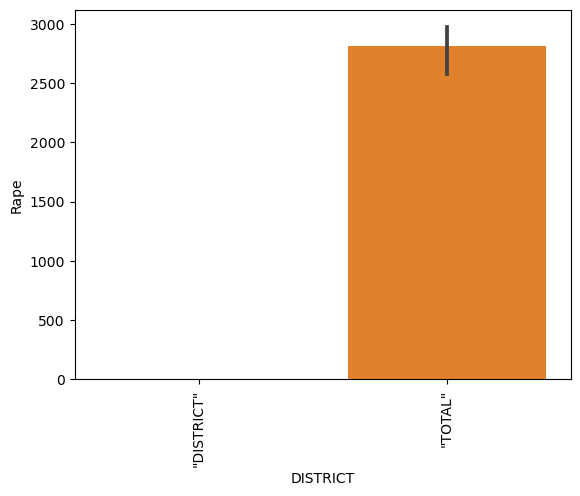

In [36]:
df['Rape'] = pd.to_numeric(df['Rape'], errors='coerce')
sns.barplot(x=df['DISTRICT'], y=df['Rape'])
plt.xticks(rotation=90)
plt.show()

* According to the dataframe, the district in West Bengal with the highest number of rape cases is Murshidabad, whereas the district in Assam with the lowest number of rape crimes is Guwahati City.

# District vs. Kidnapping Analysis:-

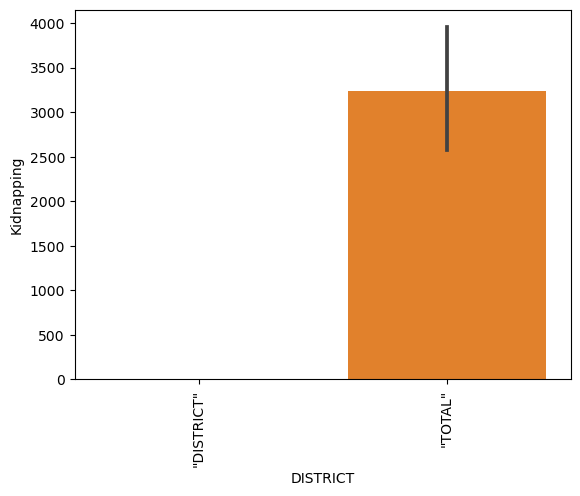

In [37]:
df['Kidnapping'] = pd.to_numeric(df['Kidnapping'], errors='coerce')
sns.barplot(x=df['DISTRICT'], y=df['Kidnapping'])
plt.xticks(rotation=90)
plt.show()

* According to the resultant Dataframe, the district of Murshidabad in West Bengal has the largest number of kidnapping cases, while the district of Guwahati City in Assam has the lowest number of cases.